# MATH97018, MATH97096: Problem Sheet 2

## 1. 

In the notes, we studied the Michaelis-Menten model for enzyme reaction kinetics.  In doing so, we reduced the original system to the nondimensional system

\begin{align*}
\epsilon\frac{dv}{d\tau} &= u - (u + K)v,\\
\frac{du}{d\tau} &= -u + (u + K - \lambda)v 
\end{align*}

with initial conditions $u(0) = 1$ and $v(0) = 0$.  We then assumed $\epsilon << 1$ and invoked the quasi-steady approximation which gave $v = u/(u + K)$ and 

\begin{align*}
u + K \log u = 1 - \lambda \tau.
\end{align*}

We observed, however, that the approximation does not allow us to impose the initial condition on $v$ and does not resolve what is happpening during the initial stages of the reaction.  In this problem, you'll use asymptotic matching of solutions to recover an approximation that is uniformly valid for all times.

\begin{enumerate}
\item Begin by rescaling time such that $\tau = \epsilon T$.  This introduces a fast time, $T$, that is $O(1)$ when $\tau$ remains small, $O(\epsilon)$. Show that the resulting system is 

\begin{align*}
\frac{dV}{dT} &= U - (U + K)V,\\
\frac{dU}{dT} &= \epsilon(-U + \left(U + K - \lambda)V\right).
\end{align*}

with initial conditions $U(0) = 1$ and $V(0) = 0$.  

\item Writing the solution as $U(T) = \sum_{n=0}^\infty \epsilon^n U_0(T)$ and $V(T) = \sum_{n=0}^\infty \epsilon^n V_0(T)$, show that 

\begin{align*}
U_0 &= 1 \\
V_0 &= \frac{1}{1 + K}\left(1 - \text{e}^{-(1 + K)T}\right). 
\end{align*}

\item Show that this solution matches that found in the notes, namely

\begin{align*}
\lim_{\tau \rightarrow 0} u &= \lim_{T \rightarrow \infty} U_0 \\
\lim_{\tau \rightarrow 0} v &= \lim_{T \rightarrow \infty} V_0.
\end{align*}

\item By considering

\begin{align*}
u(\tau) + U_0(\tau/\epsilon) - \lim_{T \rightarrow \infty} U_0 \\
v(\tau) + V_0(\tau/\epsilon) - \lim_{T \rightarrow \infty} V_0.
\end{align*}

Obtain the uniformly valid approximations

\begin{align*}
u + K \log u &= 1 - \lambda \tau \\
v &= \frac{u}{u+K} - \frac{1}{1+K}\text{e}^{-(1 + K)T}.
\end{align*}

\item Using the code below generate and plot numerical solutions, comment on how well the analytical solutions approximate those generated numerically as $\epsilon$ varies.
\end{enumerate}

1.i.\
Let $\tau=\epsilon T$, then
$$\frac{dv}{d\tau}=u-(u+K)v\quad\textrm{and}\quad\frac{1}{\epsilon}\frac{dv}{d\tau}=-u+(u+K-\lambda)v$$
The rest follows.

1.ii.\
If $U=\sum_{n=0}^\infty\epsilon^nU_0(T)$ and $V=\sum_{n=0}^\infty\epsilon^nV_0(T)$ then by comparison of co-efficients of $\epsilon$ then
\begin{align*}
\frac{dV_0}{dT} &=U_0-(U_0+K)V_0 \\
\frac{dU_0}{dT} &=0
\end{align*}
Since $U(0)=1$ and $V(0)=0$ then solving these ODEs give
\begin{align*}
U_0 &= 1 \\
V_0 &= \frac{1}{1 + K}\left(1 - \text{e}^{-(1 + K)T}\right)
\end{align*}

1.iii. \
The quasi-steady solution is
\begin{align*}
u(\tau) + K\log{u(\tau)} &= 1-\lambda\tau \\
v(\tau) = u(\tau)/(u(\tau)+K)
\end{align*}
Taking the limit as $\tau \rightarrow 0$ gives

\begin{align*}
\lim_{\tau\rightarrow 0 }[u(\tau),v(\tau)] = \bigg[1, \frac{1}{1+K}\bigg].
\end{align*}

Taking the limit as $T \rightarrow \infty$ for $U_0(T)$ and $V_0(T)$, we have 
\begin{align*}
\lim_{T \rightarrow \infty }[U_0(T),V_0(T)] = \bigg[1, \frac{1}{1+K}\bigg],
\end{align*}
which matches.

1.iv. \
Using this limit, we then have
\begin{align*}
u(\tau) + U_0({\tau/\epsilon}) - \lim_{T\rightarrow \infty}U_0 &= 1-\lambda\tau-K\log u
\end{align*}
and
\begin{align*}
v(\tau) + V_0({\tau/\epsilon}) - \lim_{T\rightarrow \infty}V_0 &= \frac{u}{u+K} - \frac{1}{1+K}\text{e}^{-(1+K)\tau/\epsilon}
\end{align*}

1.v. \
Experimenting with the code, we can confirm that the analytical solution approaches the numerical solution as $\epsilon \rightarrow 0$.  The discrepancy appears primarily in $u(\tau)$ with the numerical solution exhibiting an $O(\epsilon)$ intial decay that is not present in the analytical solution.
\end{enumerate}

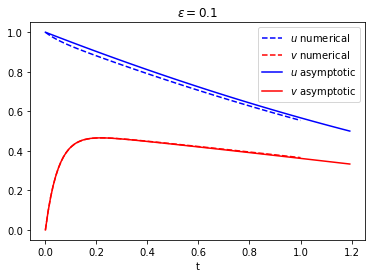

In [6]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

K = 1
lmbda = 1

def mich_ment(w, t, epsilon, K,lmbda): #w = [u,v] 
    u, v = w
    
    dudt = -u+(u+K-lmbda)*v
    dvdt = (u-(u+K)*v)/epsilon
    dwdt = [dudt, dvdt]
    return dwdt

def question1(epsilon):
    w0 = [1,0]
    t = np.linspace(0.0, 1.0, num=100)
    
    u = np.linspace(0.5, 1.0, num=100)
    tau = 1.0 - u - K*np.log(u)
    tau = tau/lmbda
    T = tau/epsilon
    v = u/(u + K) - np.exp(-(1 + K)*T)/(1 + K)
    
    w2 = odeint(mich_ment,w0,t,args=(epsilon,K,lmbda))
    plt.plot(t,w2[:,0],'b--',label=r'$u$ numerical')
    plt.plot(t,w2[:,1],'r--',label=r'$v$ numerical')
    plt.plot(tau,u,'b-',label=r'$u$ asymptotic')
    plt.plot(tau,v,'r-',label=r'$v$ asymptotic')
    
    plt.xlabel('t')
    plt.title('$\epsilon = '+str(epsilon)+'$')
    plt.legend(loc='best')
    plt.show()

question1(0.1)


## 2.
Haemoglobin, $Hb$, absorbs oxygen, $O_2$, to form an intermediate complex, $HbO_2$.  The complex then reacts with tissue, $T$, to form a product, $P$, releasing the haemoglobin.  The reactions are written 

\begin{align*}
Hb + O_2 &\underset{k}{\stackrel{k}{\rightleftharpoons}} HbO_2  \\
HbO_2 + T &\xrightarrow{k} Hb + P 
\end{align*}

where the reaction rates are all equal and scaled so that $k = 1$.  

The concentrations of $Hb$, $O_2$, $HbO_2$ and $P$ are $e, s, c,$ and $p$, respectively, while the tissue is present in such quantities that its concentration is $1$ for all time. The initial concentrations of $Hb$, $O_2$, $HbO_2$ and $P$ are respectively $e_0, s_0, 0$ and $0$.

\begin{enumerate}
\item Use the law of mass action to derive a system of ODE’s describing this reaction. Show that
$e(t) + c(t)$ is constant and equal to $e_0$. Use this to reduce the system to a system of two ODE’s
for the equations for $s(t$) and the complex, $c(t) = e_0v(t)$ in the form 

\begin{align*}
\frac{\text{d}s}{\text{d}t} = e_0(v − s(1 − v)), \\
\frac{\text{d}v}{\text{d}t} = s(1 − v) − 2v.
\end{align*}

\item Explain carefully the Michaelis-Menten quasi-steady approximation, and show that it implies that
$s(t)$ is given implicitly by 

\begin{align*}
s + 2 \log s = s_0 + 2 \log s_0 − e_0t .
\end{align*}

\item Deduce that for large times $s \approx s_0 \exp\big[ \frac{1}{2}(s_0 − e_0t)\big].$
\item Describe how $v$ changes in the very early stages of the reaction. *Hint: Use the fact that initially, $s = s_0$*
\end{enumerate}

2.i.\
By the law of mass action,\
\begin{align}
\frac{de}{dt}&=-es+2c \\
\frac{ds}{dt}&=-es+c \\
\frac{dc}{dt}&=es-2c \\
\frac{dp}{dt}&=c
\end{align}

2.ii.\
Since $\frac{d(e+c)}{dt}=\frac{de}{dt}+\frac{dc}{dt}=0$, then $e+c$ is a constant, with initial value $e(0)+c(0)=e_0+0=e_0$.
Since $c(t)=e_0v(t)=e_0-e(t)$, then $e(t)=e_0(1-v(t))$.
$$\frac{ds}{dt}=-e_0(1-v)s+c=e_0(v-s(1-v))$$
$$e_0\frac{dv}{dt}=\frac{dc}{dt}=e_0(1-v)s-2c=e_0(s(1-v)-2v)$$
The rest follows.

2.iii.\
For the quasi-steady approximation, we assume the initial concentration of Hemoglobin (enzyme) is small relative to the oxygen (substrate). This means $\epsilon=\frac{e_0}{s_0}\ll 1$. Let $\tau=e_0t$ which gives
$$\frac{ds}{d\tau}=(v-s(1-v))$$
$$e_0\frac{dv}{d\tau}=s(1-v)-2v\quad\Rightarrow\epsilon\frac{dv}{d\tau}=\frac{1}{s_0}(s(1-v)-2v)$$
Supposing $\epsilon\approx 0$, then
$$0=\frac{1}{s_0}(s(1-v)-2v)\quad\Rightarrow\quad v=\frac{s}{s+2}$$
$$\frac{ds}{d\tau}=\frac{s}{s+2}-s\left(1-\frac{s}{s+2}\right)=-\frac{s}{s+2}$$
$$\int_{s_0}^s 1+\frac{2}{S}dS=\int_{0}^\tau -1 dT$$
$$s-s_0+2\log{s}-2\log{s_0}=-\tau$$
$$s+2\log{s}=s_0+2\log{s_0}-e_0t$$

2.iv.\
For large times, $s+2\log{s}$ is small which means $s+2\log{s}\approx 2\log{s}$. By re-arranging the implicit equation,
$$s\approx s_0\exp{\frac{1}{2}(s_0-e_0t)}$$
Initially, $v=\frac{s_0}{s_0+2}\approx 1$ for large $s_0$. Then as $t$ increases, $v$ changes to $\frac{s_0\exp{\frac{1}{2}(s_0-e_0t)}}{s_0\exp{\frac{1}{2}(s_0-e_0t)}+2}$ for large times.


## 3.
Consider the following symbiotic system 

\begin{align*}
\frac{\text{d}N_1}{\text{d}T} &= r_1N_1 \bigg(1 - \frac{N_1}{K_1} + b_{12}\frac{N_2}{K_1}\bigg), \\
\frac{\text{d}N_2}{\text{d}T} &= r_2N_2 \bigg(1 - \frac{N_2}{K_2} + b_{21}\frac{N_1}{K_2}\bigg),
\end{align*}

where $N_i$ denote the population sizes. The parameters $r_i, K_i, b_{ij}$ are positive constants.

\begin{enumerate}

\item By introducing a suitable non-dimensionalisation show that the system reduces to

\begin{align*}
\frac{\text{d}u_1}{\text{d}t} &= u_1 (1-u_1 + \alpha_{12}u_2) \equiv f(u_1, u_2) \\
\frac{\text{d}u_2}{\text{d}t} &= \rho u_2 (1-u_2+\alpha_{21}u_1) \equiv g(u_1,u_2)
\end{align*}

where $\rho = r_2/r_1,\, \alpha_{12} = b_{12}K_2/K_1,\, \alpha_{21}=b_{21}K_1/K_2$.

\item Find all four steady states and show that three of them are always unstable.
\item Show that unbounded growth can occur when $\alpha_{12}\alpha_{21} > 1$ and a stable mutualistic fixed point
occurs when $\alpha_{12}\alpha_{21} < 1$.
\end{enumerate}

3.i.\
Let $N_1=K_1u_1$, $N_2=K_2u_2$, and $T=\frac{t}{r_1}$. Then
\begin{align*}
r_1K_1\frac{\text{d}u_1}{\text{d}t} &= r_1K_1u_1 \bigg(1 - u_1 + \alpha_{12}u_2\bigg) \\
r_1K_2\frac{\text{d}N_2}{\text{d}T} &= r_2K_2u_2 \bigg(1 - u_2 + \alpha_{21}u_1\bigg)
\end{align*}
Dividing both equations appropriately gives
\begin{align*}
\frac{\text{d}u_1}{\text{d}t} &= u_1 \bigg(1 - u_1 + \alpha_{12}u_2\bigg) \\
\frac{\text{d}u_2}{\text{d}t} &= \rho u_2 \bigg(1 - u_2 + \alpha_{21}u_1\bigg)
\end{align*}

3.ii.\
Let $f=g=0$. Then steady states are
\begin{align*}
u^*_1&=(0,0) \\
u^*_2&=(0,1 + \alpha_{21}u_1)=(0,1) \\
u^*_3&=(1 + \alpha_{12}u_2,0)=(1,0) \\
u^*_4&=(1 + \alpha_{12}u_2,1 + \alpha_{21}u_1)=\left(\frac{1+\alpha_{12}}{1-\alpha_{12}\alpha_{21}},\frac{1+\alpha_{21}}{1-\alpha_{12}\alpha_{21}}\right)
\end{align*}
The Jacobian is
$$J(u_1,u_2)=
\begin{bmatrix}
1-2u_1+\alpha_{12}u_2 & \alpha_{12}u_1 \\
\rho\alpha_{21}u_2 & \rho-2\rho u_2+\rho\alpha_{21}u_1 
\end{bmatrix}
$$
For $u^*_1$, the Jacobian is
$$J(0,0)=
\begin{bmatrix}
1 & 0 \\
0 & \rho
\end{bmatrix}
$$
The eigenvalues are $\lambda\in\{1,\rho\}\subset\mathbb{R}^{+}$, so $u^*_1$ is unstable.

For $u^*_2$, the Jacobian is
$$J(0,1)=
\begin{bmatrix}
1+\alpha_{12} & 0 \\
\rho\alpha_{21} & -\rho
\end{bmatrix}
$$
The eigenvalues are $\lambda\in\{1+\alpha_{12},-\rho\}$. Since $1+\alpha_{12}>0$, $u^*_2$ is unstable.

For $u^*_3$, the Jacobian is
$$J(1,0)=
\begin{bmatrix}
-1 & \alpha_{12} \\
0 & \rho+\rho\alpha_{21}
\end{bmatrix}
$$
The eigenvalues are $\lambda\in\{-1,\rho+\rho\alpha_{21}\}$. Since $\rho+\rho\alpha_{21}>0$, $u^*_3$ is unstable.\
Hence $u^*_1$, $u^*_2$, $u^*_3$ are always unstable.

For $u^*_4$, the Jacobian is
$$J\left(\frac{1+\alpha_{12}}{1-\alpha_{12}\alpha_{21}},\frac{1+\alpha_{21}}{1-\alpha_{12}\alpha_{21}}\right)=
\begin{bmatrix}
-\frac{(1+\alpha_{12})}{1-\alpha_{12}\alpha_{21}} & \alpha_{12}\frac{1+\alpha_{12}}{1-\alpha_{12}\alpha_{21}} \\
\rho\alpha_{21}\frac{1+\alpha_{21}}{1-\alpha_{12}\alpha_{21}} & -\frac{\rho(1+\alpha_{21})}{1-\alpha_{12}\alpha_{21}}
\end{bmatrix}
$$
The eigenvalues are given by
$$
\left(-\frac{(1+\alpha_{12})}{1-\alpha_{12}\alpha_{21}}-\lambda\right)\left(-\frac{\rho(1+\alpha_{21})}{1-\alpha_{12}\alpha_{21}}-\lambda\right)-\frac{\rho\alpha_{12}\alpha_{21}(1+\alpha_{12})(1+\alpha_{21})}{(1-\alpha_{12}\alpha_{21})^2}=0
$$
$$
\lambda^2
+\frac{(1+\alpha_{12})+\rho(1+\alpha_{21})}{1-\alpha_{12}\alpha_{21}}\lambda
+\frac{\rho(1+\alpha_{12})(1+\alpha_{21})}{1-\alpha_{12}\alpha_{21}}=0
$$
$$
\lambda_{\pm}=\frac{-\frac{(1+\alpha_{12})+\rho(1+\alpha_{21})}{1-\alpha_{12}\alpha_{21}}\pm\sqrt{\left(\frac{(1+\alpha_{12})+\rho(1+\alpha_{21})}{1-\alpha_{12}\alpha_{21}}\right)^2-\frac{4\rho(1+\alpha_{12})(1+\alpha_{21})}{1-\alpha_{12}\alpha_{21}}}}{2}
$$
So the point is stable if $-\frac{(1+\alpha_{12})+\rho(1+\alpha_{21})}{1-\alpha_{12}\alpha_{21}}<0\Leftrightarrow\frac{1}{1-\alpha_{12}\alpha_{21}}>0\Leftrightarrow \alpha_{12}\alpha_{21}<1$.\
Otherwise unbounded growth occurs and $u^*_4$ is unstable.

## 4.
Consider the general model of the predator prey system

\begin{align*}
\frac{\text{d}N}{\text{d}t} &= \rho N\bigg( 1-\frac{N}{K} \bigg) - \gamma P f(N), \\
\frac{\text{d}P}{\text{d}t} &= P(\sigma f(N) - \eta)
\end{align*}

where $N(t)$ are the number of prey and $P(t)$ the number of predators, which we assume to vary
continuously in time. The parameters $K, \rho, \gamma, \sigma, \eta$ are positive constants. Let

\begin{align*}
f(N) = \frac{N}{N+D}.
\end{align*}

\begin{enumerate}

\item What assumptions are made on the per-predator rate of predation, $\gamma f(N)$, when choosing $f(N)$
as above? Hint: Consider the behaviour of $\gamma f(N)$ for large and small values of $N$.

\item Show that non-dimensionalisation of the form $\tau= \rho t$, $u = N/K$, $v = P \gamma/(\rho K)$ produces the
system

\begin{align}
\frac{\text{d}u}{\text{d}\tau} &= u(1-u) - \frac{uv}{u+\delta} \nonumber \\
\frac{\text{d}v}{\text{d}\tau} &= v \bigg( \lambda \frac{u}{u+\delta} - \mu \bigg) 
\label{eq:predprey}
\end{align}

and state the values of the positive parameters $\lambda, \delta, \mu$.


\item Assuming that $u \geq 0$ and $v \geq 0$, show that $(u, v) = (0, 0)$ and $(u, v) = (1, 0)$ are always steady
states of \eqref{eq:predprey}. Show also that if $\lambda > \mu$ and $\lambda > \mu(1 + \delta)$ then there is an additional steady state

\begin{align*}
(u^*, v^*) = \bigg( \frac{\mu \delta}{\lambda - \mu} \,, \frac{\lambda \delta}{(\lambda - \mu)^2} (\lambda - \mu(1+\delta)) \bigg).
\end{align*}


\item Show that if $(u^∗, v^∗)$ is a steady state then the other two fixed points are unstable.


\item Show that at $(u^∗, v^∗)$, the Jacobian matrix of the system is

\begin{align*}
J = \begin{pmatrix}
1 - 2u^* - \delta \frac{(1-u^*)}{u^*+\delta} & \frac{-u^*}{u^* + \delta}\\
\delta \lambda \frac{(1-u^*)}{u^*+\delta} & 0
\end{pmatrix}
\end{align*}

and that $(u^∗, v^∗)$ is stable if $(1 + \delta)\mu > \lambda(1−\delta)$. 

Hint: When calculating the Jacobian you may find it useful to recall the equation satisfied by $u^∗$ and also write $v^∗$ in terms of $u^∗$.
\end{enumerate}

4.i.\
For large values of $N$, $\frac{\gamma N}{N+D}\rightarrow \gamma$.
For small values of $N$, $\frac{\gamma N}{N+D}\rightarrow 0$. So the assumption for the per-predation rate is that for small populations of prey, the predation rate is low, increasing up to $\gamma$ when the population of prey is high.

4.ii.\
Since $t=\frac{\tau}{\rho}$, $N=Ku$, and $P=\frac{\rho Kv}{\gamma}$, then
\begin{align*}
\rho K\frac{du}{d\tau} &= \rho Ku(1-u)-\rho Kv\frac{Ku}{Ku+D} \\
\frac{\rho^2 K}{\gamma}\frac{dv}{d\tau} &= \frac{\rho Kv}{\gamma}\left(\sigma\frac{Ku}{Ku+D}-\eta\right)
\end{align*}

This gives
\begin{align*}
\frac{du}{d\tau} &= u(1-u)-\frac{uv}{u+\delta} \\
\frac{dv}{d\tau} &= v\left(\lambda\frac{u}{u+\delta}-\mu\right)
\end{align*}
Where $\delta=\frac{D}{K}$, $\lambda=\frac{\sigma}{\rho}$, and $\mu=\frac{\eta}{\rho}$.

4.iii.\
The nullclines are
\begin{align*}
u\left(1-u-\frac{v}{u+\delta}\right)=0 \\
v\left(\lambda\frac{u}{u+\delta}-\mu\right)=0
\end{align*}
$(u,v)=(0,0)$ and $(u,v)=(1,0)$ statisfy both nullclines, and hence they are steady states.

For $\lambda > \mu$ and $\lambda > \mu(1 + \delta)$,
\begin{align*}
v&=(1-u)(u+\delta) \\
\lambda u&=\mu(u+\delta) \\
\end{align*}
This gives the steady state
\begin{align*}
u&=\frac{\mu\delta}{\lambda-\mu}>0 \\
v&=\frac{\lambda\delta(\lambda-\mu(1+\delta))}{(\lambda-\mu)^2}>0
\end{align*}

The Jacobian is
$$
J(u,v)=
\begin{bmatrix}
1-2u-\frac{v}{u+\delta}+\frac{uv}{(u+v)^2} & -\frac{u}{u+\delta} \\
\frac{\lambda v}{u+\delta}-\frac{\lambda uv}{(u+\delta)^2} & \lambda\frac{u}{u+\delta}-\mu
\end{bmatrix}
$$

For (0,0),
$$
J(0,0)=
\begin{bmatrix}
1 & 0 \\
0 & -\mu
\end{bmatrix}
$$
The eigenvalues are $1$ and $-\mu$, and since $1>0$ then $(0,0)$ is unstable.

For (1,0),
$$
J(1,0)=
\begin{bmatrix}
-1 & -\frac{1}{1+\delta} \\
0 & \frac{\lambda}{1+\delta}-\mu
\end{bmatrix}
$$
The eigenvalues are $-1$ and $\frac{\lambda}{1+\delta}-\mu$, and since $\frac{\lambda}{1+\delta}-\mu>0$ then $(1,0)$ is unstable.

For $\left(\frac{\mu\delta}{\lambda-\mu},\frac{\lambda\delta(\lambda-\mu(1+\delta))}{(\lambda-\mu)^2}\right)$,
$$
J\left(\frac{\mu\delta}{\lambda-\mu},\frac{\lambda\delta(\lambda-\mu(1+\delta))}{(\lambda-\mu)^2}\right)=
\begin{bmatrix}
1 - 2u^* - \delta \frac{(1-u^*)}{u^*+\delta} & \frac{-u^*}{u^* + \delta}\\
\delta \lambda \frac{(1-u^*)}{u^*+\delta} & 0
\end{bmatrix}
$$
Since $v^*=(1-u^*)(u^*+\delta)$ and $\lambda\frac{u^*}{u^*+\delta}-\mu=0$.

The eigenvalues are given by the roots of $x$, where
$$
-x\left(1 - 2u^* - \delta \frac{(1-u^*)}{u^*+\delta}-x\right)-\frac{-u^*}{u^* + \delta}\delta \lambda \frac{(1-u^*)}{u^*+\delta}=0
$$

$$
x^2-\left(1 - 2u^* - \delta \frac{(1-u^*)}{u^*+\delta}\right)x+\frac{\lambda\delta u^*(1-u^*)}{(u^*+\delta)^2}=0
$$

The point is stable if
$$
1 - 2u^* - \delta \frac{(1-u^*)}{u^*+\delta}<0
$$
This simplifies to
$$
\frac{\mu\left(\lambda\left(1-\delta\right)-\mu\left(1+\delta\right)\right)}{\lambda\left(\lambda-\mu\right)}<0
$$
As $\lambda, \mu, \lambda-\mu >0$, then we need
$$
\lambda\left(1-\delta\right)-\mu\left(1+\delta\right)<0
$$
Which happens if
$$
\lambda\left(1-\delta\right)<\mu\left(1+\delta\right)
$$

## 5.
Consider the criss-cross venereal infection model for a heterosexual population 

\begin{align*}
\frac{dS}{dt} &= -r SI', \\
\frac{dI}{dt} &= rSI'-aI, \\
\frac{dR}{dt} &= aI, \\
\frac{dS'}{dt} &= -r'S'I',\\
\frac{dI'}{dt} &= r'S'I - a'I',\\
\frac{dR'}{dt} &= a'I',
\end{align*}

where $S$, $I$ and $R$ are, respectively, the susceptibles, infectives and the removed class for the male population, while $S'$, $I'$ and $R'$ are, respectively, the susceptibles, infectives and the removed class for the female population. All parameters are positive constants and the initial values for $S, I, R, S', I',$ and $R'$ are $S_0, I_0, 0, S'_0,I'_0,$ and $0$, respectively.

\begin{enumerate}
\item Show that the female and male populations are constant and hence show that $S(t) = S_0 \exp [-r R' / a']$
\item Deduce that $S(\infty)>0$ and $I(\infty) = 0$ with similar results for $S'$ and $I'$. 
\item Show that the threshold condition for an epidemic ($dI/dt > 0, dI'/dt > 0$ at $t = 0$) to occur is at least one of

\begin{align*}
\frac{S_0 I'_0}{I_0} &> \frac{a}{r} \\
\frac{S'_0 I_0}{I'_0} &> \frac{a'}{r'} 
\end{align*}

\end{enumerate}

5.i.\
\begin{align*}
\frac{\text{d}(S+I+R)}{\text{d}t} &= 0 \\
\frac{\text{d}(S'+I'+R')}{\text{d}t} &= 0
\end{align*}
Which means that $S+I+R$ and $S'+I'+R'$ are constants and equal to their initial values $S_0+I_0$ and $S'_0+I'_0$ respectively.

5.ii.\
$$\frac{dS}{dt}=-rS(S'_0+I'_0-S'-R')$$
$$\frac{dR'}{dt}=a'(S'_0+I'_0-S'-R')$$
Therefore,
$$\frac{dS}{dR'}=-\frac{rS}{a'}$$
$$\int_{S_0}^S\frac{1}{S}dS=\int_{0}^{R'}-\frac{r}{a'}dR'$$
$$\log{\frac{S}{S_0}}=-\frac{rR'}{a'}$$
$$S=S_0\exp{\left(-\frac{rR'}{a'}\right)}$$

5.iii.\
$$S(\infty)=S_0\exp{\left(-\frac{rR'(\infty)}{a'}\right)}$$
But since $R'(t)$ is bounded by $S'_0+I'_0$ for all $t$ then $R'(\infty)$ is some positive finite value so that $S(\infty)>0$. \
Since the limit $\lim_{t\rightarrow\infty}R'(t)=R'(\infty)$ exists and $\lim_{t\rightarrow\infty}\frac{dR'}{dt}=\frac{dR'}{dt}(\infty)=a'I'(\infty)$ exists so $\frac{dR'}{dt}(\infty)=a'I'(\infty)=0$ so $I'(\infty)=0$.
By similar reasoning, $S'(\infty)>0$ and $I(\infty)=0$.

5.iv.\
$$\frac{dI}{dt}(0)=rS_0I'_0-aI_0>0\quad\Rightarrow\quad\frac{S_0 I'_0}{I_0} > \frac{a}{r}$$
$$\frac{dI'}{dt}(0)=rS'_0I_0-a'I'_0>0\quad\Rightarrow\quad\frac{S'_0 I_0}{I'_0} > \frac{a'}{r'}$$